In [13]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_valid, y_train,  y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25)

print(X_train.shape, y_train.shape)

(45000, 28, 28) (45000,)


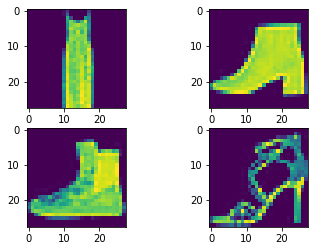

In [8]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(X_train[0])
ax[0][1].imshow(X_train[1])
ax[1][0].imshow(X_train[2])
ax[1][1].imshow(X_train[3])

In [31]:
import os
import time

root_logdir = os.path.join(os.curdir, "tf_logs")

def run_logdir():
    root_logdir = os.path.join(os.curdir, "tf_logs")
    run_id = time.strftime("%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


print(run_logdir())

.\tf_logs\2020_10_17-16_23_16


In [33]:
from tensorflow.keras import activations, layers, initializers, callbacks, models
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU, BatchNormalization, ReLU, ELU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam, Nadam, Adamax

es_cb = EarlyStopping(patience=3, monitor='val_loss') # early stopping at min loss
md_cb = ModelCheckpoint("f_mnist_model_A.h5", save_best_only=True)
tb_cb = TensorBoard(run_logdir())

sgd_vanilla = SGD(lr = 1e-3)
sgd_momentum = SGD(lr = 1e-3, momentum=0.9)
sgd_nesterove = SGD(lr = 1e-3, momentum=0.9, nesterov=True)
adagrad = Adagrad(lr = 1e-3, epsilon= 1e-7)

optimisers = [sgd_vanilla, sgd_momentum, sgd_nesterove, adagrad]
runs = []
NUM_EPOCHS = 5

for opt in optimisers:
    keras.backend.clear_session()    
    model = Sequential([
        Flatten(input_shape=[28, 28]),
        BatchNormalization(),
        Dense(300, activation = "relu"),
        Dense(300, activation = "relu"),
        Dense(300, activation = "relu"),
        Dense(10, activation = "softmax")
    ])
    
    model.compile(optimizer =  opt, loss = "sparse_categorical_crossentropy", metrics = "accuracy")
    history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_data = (X_valid, y_valid),
                        verbose = False)
    print(model.evaluate(X_test, y_test))
    runs.append(history.history)
    

313/313 [==============================] - 0s 728us/step - loss: 0.5034 - accuracy: 0.8213
[0.5034307837486267, 0.8213000297546387]
313/313 [==============================] - 0s 741us/step - loss: 0.3683 - accuracy: 0.8697
[0.3683238923549652, 0.869700014591217]
313/313 [==============================] - 0s 847us/step - loss: 0.3777 - accuracy: 0.8672
[0.37768223881721497, 0.8672000169754028]
313/313 [==============================] - 0s 847us/step - loss: 0.4405 - accuracy: 0.8482
[0.44054219126701355, 0.8482000231742859]


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
pd.DataFrame(runs[0]).plot(ax = ax[0][0], title = "SGD")
pd.DataFrame(runs[1]).plot(ax = ax[0][1], title = "SGD (Momentum)")
pd.DataFrame(runs[2]).plot(ax = ax[1][0], title = "SGD (Nesterov)")
pd.DataFrame(runs[2]).plot(ax = ax[1][1], title = "AdaGrad")

<AxesSubplot:title={'center':'AdaGrad'}>